In [1]:
%load_ext autoreload
%autoreload 2
from dotenv import load_dotenv
load_dotenv();

In [2]:
import src.features.build_features as FeaturesManager
import src.visualization.visualize as VizManager

import numpy as np
import xgboost as xgb

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

ModuleNotFoundError: No module named 'xgboost'

In [4]:
# Loading data
seasons_year = [2015, 2016, 2017, 2018]
season_type = "Regular"
features_data_df = FeaturesManager.build_features(seasons_year, season_type)
features_data_df.head()

,Game ID,Event Index,Period,Team,Type,Shot Type,Shooter,Shooter ID,Goalie,Goalie ID,...,Is Goal,Is Empty,Period seconds,Game seconds,Last event angle,Rebound,Change in Shot Angle,Speed From Previous Event,Shooter Goal Ratio Last Season,Goalie Goal Ratio Last Season
0,2015020001,24,1,Montréal Canadiens (MTL),GOAL,Wrist Shot,Max Pacioretty,8474157,Jonathan Bernier,8473541,...,1,0,189,189,-18.434949,False,0.000000,3.824492,0.122517,0.087608
1,2015020001,123,2,Toronto Maple Leafs (TOR),GOAL,Deflected,James van Riemsdyk,8474037,Carey Price,8471679,...,1,0,19,1219,-5.648247,False,0.000000,4.374802,0.108871,0.066564
2,2015020001,288,3,Montréal Canadiens (MTL),GOAL,Snap Shot,Alex Galchenyuk,8476851,Jonathan Bernier,8473541,...,1,0,722,3122,14.574216,True,14.574216,15.435349,0.122699,0.087608
3,2015020001,329,3,Montréal Canadiens (MTL),GOAL,Wrist Shot,Max Pacioretty,8474157,Brian Flynn,8476808,...,1,1,1169,3569,-7.926927,False,0.000000,15.470234,0.122517,NaN
4,2015020001,7,1,Toronto Maple Leafs (TOR),SHOT,Wrist Shot,Brad Boyes,8468504,Carey Price,8471679,...,0,0,51,51,10.525108,False,0.000000,14.025066,0.092715,0.066564


In [36]:
# Q5.1 - Baseline XGBoost model
xgb_base_model = xgb.XGBClassifier()
X = features_data_df[["Shot distance", "Shot angle"]]
y = features_data_df["Is Goal"] == True
X_train, X_test, y_train, y_test = train_test_split(X, y)
pipe = make_pipeline(StandardScaler(), xgb_base_model)

In [37]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=0, ...))])

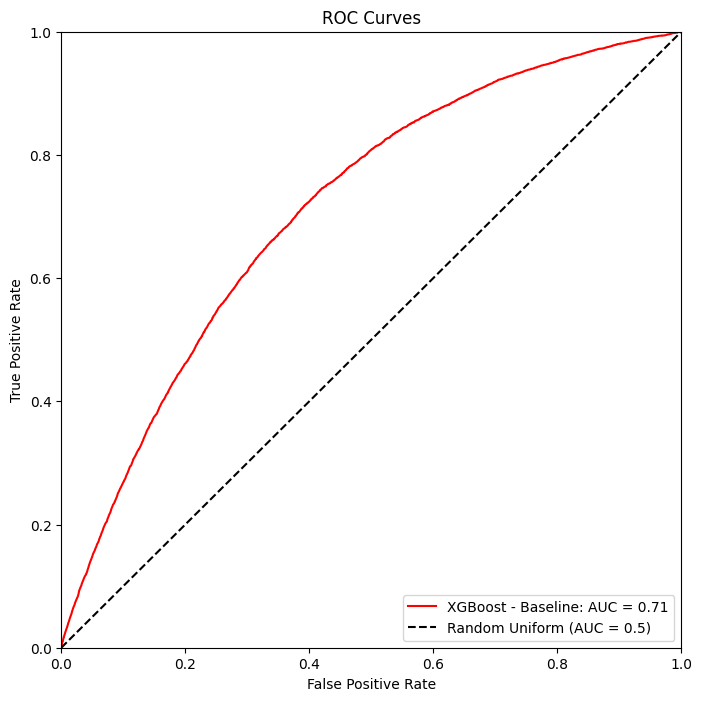

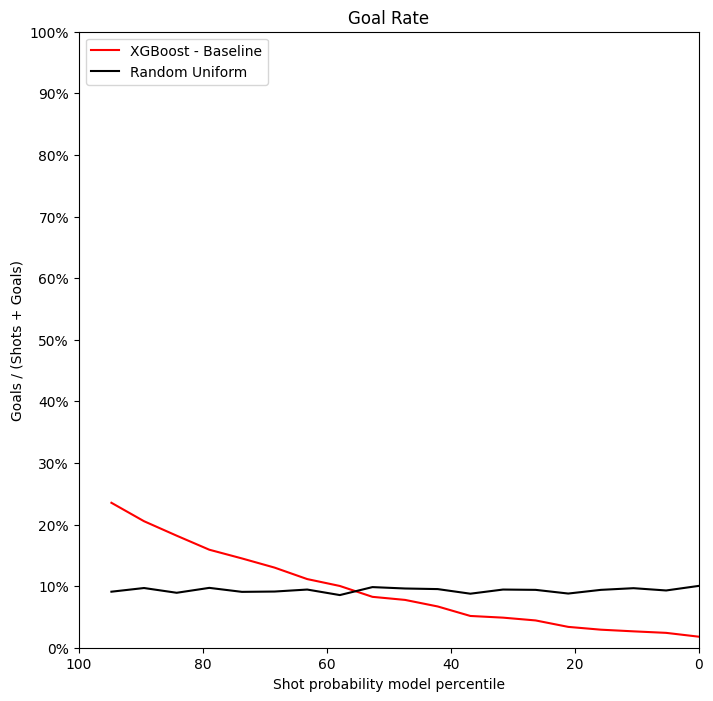

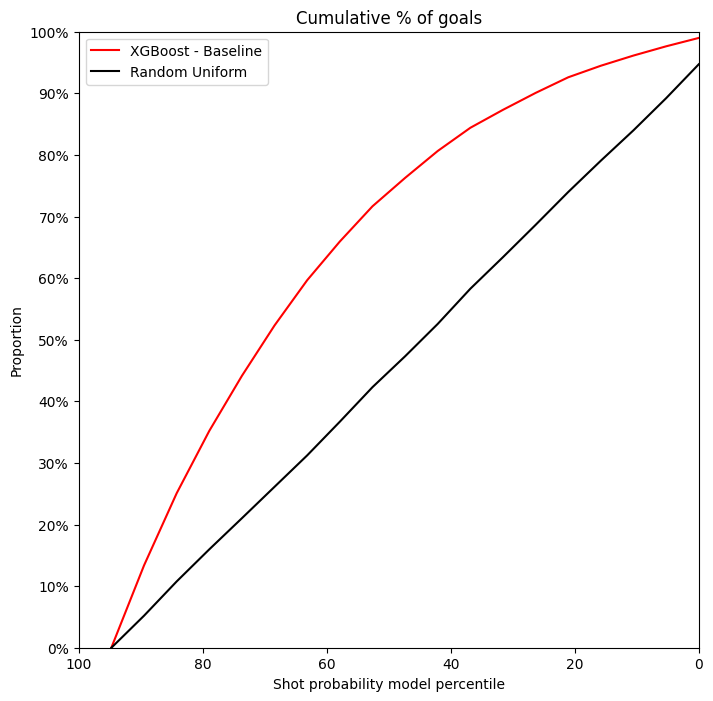

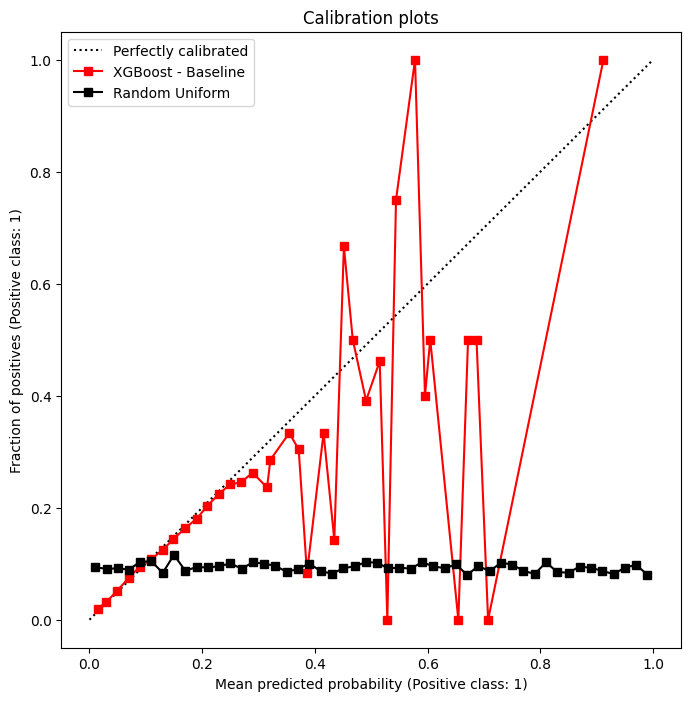

In [38]:
preds = pipe.predict_proba(X_test)
VizManager.plot_all_figures([(pipe, 'XGBoost - Baseline', X_test, y_test)])